# Visualization of inversion - Complex data

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import matplotlib as mpb
import scipy as sp

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.gravmag.transform import reduce_to_pole
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf

/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")
/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/myv.py:51: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")


In [2]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

In [3]:
mypath = 'data/real_obs_pts/tfa_inversion/multiple_inc-50_dec9_r650_int12_z0-300_dz800_varz100_varint3_varinc5_vardec5/'

In [4]:
with open(mypath+'/inversion.pickle') as w:
        results = pickle.load(w)

In [5]:
with open('data/model_real_obs_pts.pickle') as w:
        model = pickle.load(w)

In [6]:
verts_true = mfun.plot_prisms(model['prisms'])

In [7]:
xp = results['x']
yp = results['y']
zp = results['z']

### Calculating mean, std, misfit and projections for the plots

In [8]:
mean_list = []
std_list = []
misfit_list = []
verts_list = []
for r in results['results']:
    std_list.append(np.std(r[-2]))
    misfit_list.append(np.std(r[-2])*100./np.std(results['observed_data']))
    mean_list.append(np.mean(r[-2]))
    verts_list.append(mfun.plot_prisms(r[2]))

### Defining some parameters for the plots

In [9]:
nbins=30
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

vmin = 0
vmax = 0
for r in results['results']:
    if np.max(r[-2]) > vmax:
        vmax = np.max(r[-2])
    elif np.min(r[-2]) < vmin:
        vmin = np.min(r[-2])

In [13]:
results['results'][0]

[array([ 43.30533118,  43.30013474,  43.24930257, ..., -39.58233351,
        -38.43805884, -37.33341389]),
 array([ 321.7371421 ,  561.5343172 ,  609.31878803,  715.53512713,
         892.0576537 ,  882.58404509,  960.90027794,  853.04055623,
         730.99650235,  842.86259751,  667.48942653,  570.56555399,
         295.1301052 ,  330.07003204,  206.64670538,  -37.93405651,
         167.22401516,  508.9490543 ,  751.07426411,  855.86713354,
        1072.7754117 , 1003.69678625,  700.28945676,  733.63408233,
         946.10720378,  720.11259894,  786.53399496,  987.77648961,
         664.1171646 ,  630.26910779,  321.09285648,  544.66193612,
         -21.79057586,   59.81263397,  953.4570246 ,  937.71140967,
         822.53069648,  864.74298778,  943.71673416, 1050.31433785,
        1114.18074791,  969.18432502,  774.61021592,  760.00475298,
         949.18345686, 1066.13819893,  850.84404298,  690.66451636,
         739.53805153,  -55.42781767,   94.62106937,  726.31913273,
         

# Top x Intensity

In [421]:
plot1 = [results['results'][11], results['results'][3],
        results['results'][7], results['results'][2],
        results['results'][0], results['results'][1],
        results['results'][12], results['results'][4],
        results['results'][8]]
std1 = [std_list[11], std_list[3],
        std_list[7], std_list[2],
        std_list[0], std_list[1],
        std_list[12], std_list[4],
        std_list[8]]
mean1 = [mean_list[11], mean_list[3],
        mean_list[7], mean_list[2],
        mean_list[0], mean_list[1],
        mean_list[12], mean_list[4],
        mean_list[8]]
verts1 = [verts_list[11], verts_list[3],
        verts_list[7], verts_list[2],
        verts_list[0], verts_list[1],
        verts_list[12], verts_list[4],
        verts_list[8]]

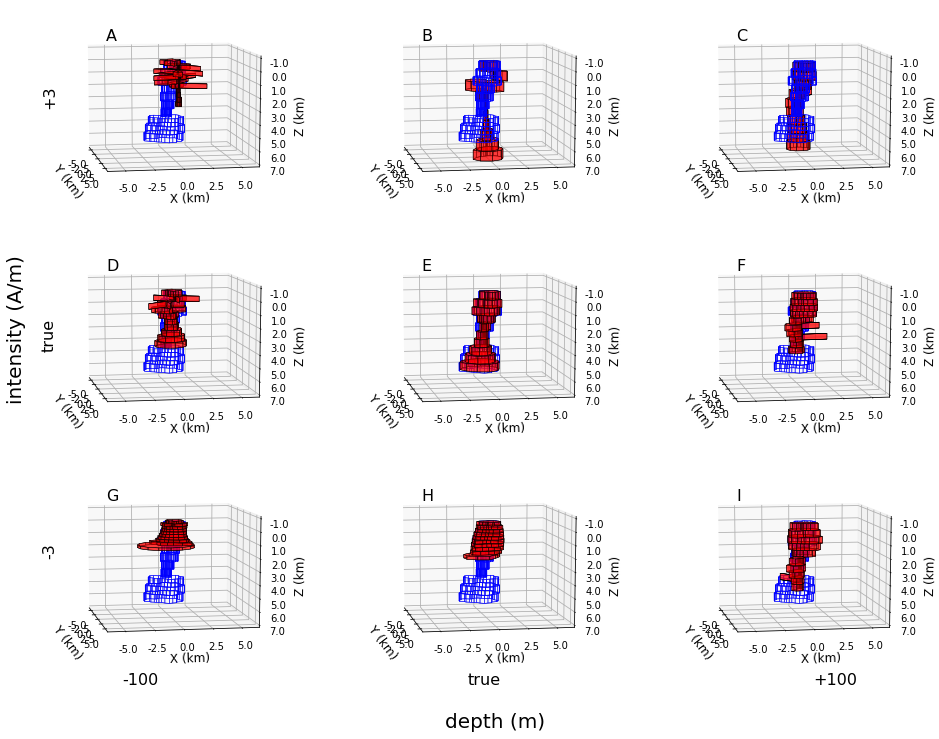

In [422]:
fig = plt.figure(figsize=(16,12))


for i, l in enumerate(letters):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    ax.add_collection3d(Poly3DCollection(verts_true, 
        alpha=0, facecolor='b', linewidths=0.5, edgecolors='b'))
    ax.add_collection3d(Poly3DCollection(verts1[i], alpha=0.5, 
         facecolor='r', linewidths=0.5, edgecolors='k'))

    ax.text(-35000, 4, 4, l, zdir=None, va='top', ha='left', fontsize= 16)
    ax.set_xlim(-5000, 5000, 100)
    ax.set_ylim(-5000, 5000, 100)
    ax.set_zlim(7000, -1000, 100)
    ax.set_xlabel('Y (km)', fontsize= 12)
    ax.set_ylabel('X (km)', fontsize= 12)
    ax.set_zlabel('Z (km)', fontsize= 12)
    ax.view_init(10, -10)
    ax.set_xticklabels(np.linspace(-5, 5, 5))
    ax.set_yticklabels(np.linspace(-5, 5, 5))
    ax.set_zticklabels(np.linspace(-1, 7, 9))

    #ax.tricontourf(xp, yp, results[i]['residual'],
    #                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

fig.text(0.1, 0.58, 'intensity (A/m)', rotation=90, fontsize=20)
fig.text(0.13, 0.51, 'true', rotation=90, fontsize=16)
fig.text(0.13, 0.25, '-%d' % (results['var'][1]), rotation=90, fontsize=16)
fig.text(0.13, 0.78, '+%d' % (results['var'][1]), rotation=90, fontsize=16)
fig.text(0.48, 0.05, 'depth (m)', fontsize=20)
fig.text(0.5, 0.1, 'true', fontsize=16)
fig.text(0.2, 0.1, '-%d' % (results['var'][0]), fontsize=16)
fig.text(0.8, 0.1, '+%d' % (results['var'][0]), fontsize=16)
plt.savefig(mypath+'complex_3d_estimates_topxint_true.png', dpi=300)
plt.show()

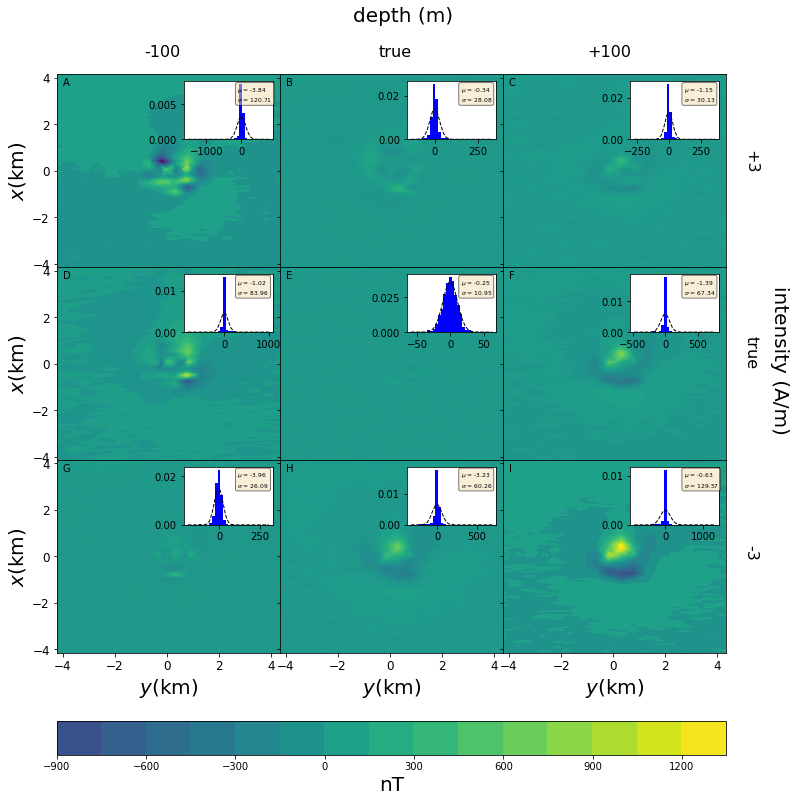

In [423]:
# plot
fig, axes = plt.subplots(3, 3, figsize=(12,14), sharey=True, sharex=True,
                         gridspec_kw={'hspace': 0, 'wspace': 0})
plt.text(6, 11, 'intensity (A/m)', rotation=-90, fontsize=20)
plt.text(5, 9, 'true', rotation=-90, fontsize=16)
plt.text(5, 0, '-%d' % (results['var'][1]), rotation=-90, fontsize=16)
plt.text(5, 17, '+%d' % (results['var'][1]), rotation=-90, fontsize=16)

plt.text(-10, 23, 'depth (m)', fontsize=20)
plt.text(-9, 21.5, 'true', fontsize=16)
plt.text(-18, 21.5, '-%d' % (results['var'][0]), fontsize=16)
plt.text(-1, 21.5, '+%d' % (results['var'][0]), fontsize=16)

ax = [axes[0][0],axes[0][1],axes[0][2],
            axes[1][0],axes[1][1],axes[1][2],
            axes[2][0],axes[2][1],axes[2][2]]

for r, s, m, a, l in zip(plot1, std1, mean1, ax, letters):
    cb = a.tricontourf(yp/1000., xp/1000., r[-2], 20, cmap='viridis',
                       vmin=vmin, vmax=vmax)
    #a.set_ylabel('$x$(m)', fontsize=20)
    a.set_xlabel('$y$(km)', fontsize=20)
    a.tick_params(labelsize=12)
    a.text(-4, 4, l, va='top', ha='left')
    inset = inset_axes(a, width="40%", height="30%", loc=1, borderpad=0.7)
    n, bins, patches = plt.hist(r[-2],bins=nbins, normed=True, color='blue')
    gauss = sp.stats.norm.pdf(bins, m, s)
    inset.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
    inset.text(0.6, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(m, s),
                transform=inset.transAxes, fontsize=6,
            va='top', ha='left', bbox=props)
ax[0].set_ylabel('$x$(km)', fontsize=20)
ax[3].set_ylabel('$x$(km)', fontsize=20)
ax[6].set_ylabel('$x$(km)', fontsize=20)
cbar = plt.colorbar(cb, ax=axes, orientation="horizontal", pad=.09)
cbar.set_label('nT', fontsize=20)
plt.savefig(mypath+'complex_3d_residual_topxint_true.png', dpi=300)
plt.show()

# Top x Direction

In [424]:
plot2 = [results['results'][13], results['results'][5],
        results['results'][9], results['results'][2],
        results['results'][0], results['results'][1],
        results['results'][14], results['results'][6],
        results['results'][10]]
std2 = [std_list[13], std_list[5],
        std_list[9], std_list[2],
        std_list[0], std_list[1],
        std_list[14], std_list[6],
        std_list[10]]
mean2 = [mean_list[13], mean_list[5],
        mean_list[9], mean_list[2],
        mean_list[0], mean_list[1],
        mean_list[14], mean_list[6],
        mean_list[10]]
verts2 = [verts_list[13], verts_list[5],
        verts_list[9], verts_list[2],
        verts_list[0], verts_list[1],
        verts_list[14], verts_list[6],
        verts_list[10]]

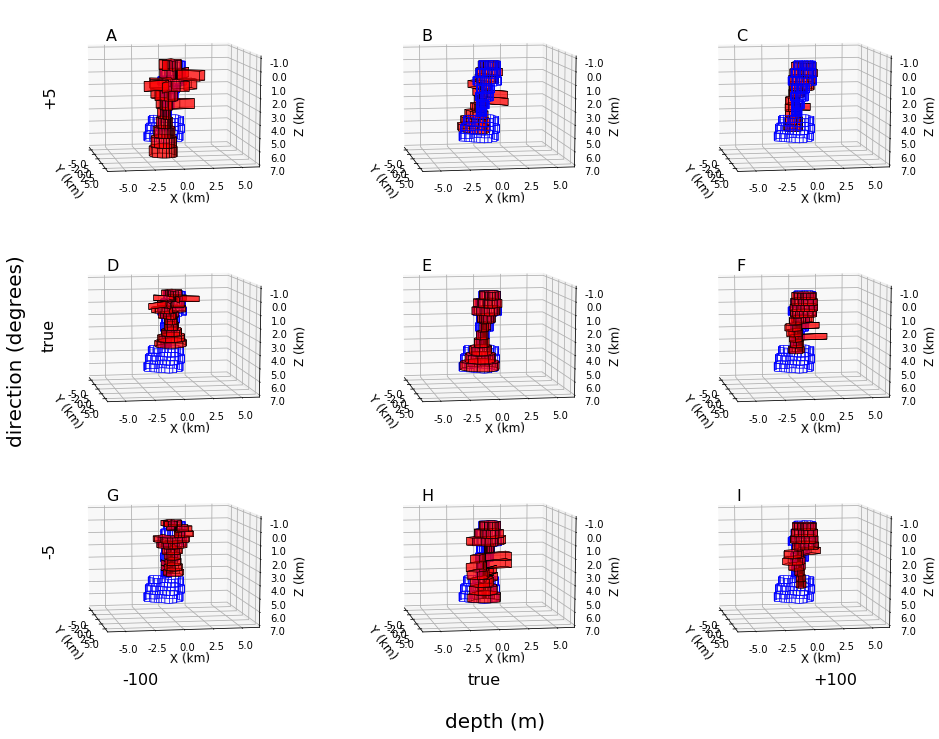

In [425]:
fig = plt.figure(figsize=(16,12))


for i, l in enumerate(letters):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    ax.add_collection3d(Poly3DCollection(verts_true, 
        alpha=0, facecolor='b', linewidths=0.5, edgecolors='b'))
    ax.add_collection3d(Poly3DCollection(verts2[i], alpha=0.5, 
         facecolor='r', linewidths=0.5, edgecolors='k'))

    ax.text(-35000, 4, 4, l, zdir=None, va='top', ha='left', fontsize= 16)
    ax.set_xlim(-5000, 5000, 100)
    ax.set_ylim(-5000, 5000, 100)
    ax.set_zlim(7000, -1000, 100)
    ax.set_xlabel('Y (km)', fontsize= 12)
    ax.set_ylabel('X (km)', fontsize= 12)
    ax.set_zlabel('Z (km)', fontsize= 12)
    ax.view_init(10, -10)
    ax.set_xticklabels(np.linspace(-5, 5, 5))
    ax.set_yticklabels(np.linspace(-5, 5, 5))
    ax.set_zticklabels(np.linspace(-1, 7, 9))

    #ax.tricontourf(xp, yp, results[i]['residual'],
    #                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

fig.text(0.1, 0.58, 'direction (degrees)', rotation=90, fontsize=20)
fig.text(0.13, 0.51, 'true', rotation=90, fontsize=16)
fig.text(0.13, 0.25, '-%d' % (results['var'][2]), rotation=90, fontsize=16)
fig.text(0.13, 0.78, '+%d' % (results['var'][3]), rotation=90, fontsize=16)
fig.text(0.48, 0.05, 'depth (m)', fontsize=20)
fig.text(0.5, 0.1, 'true', fontsize=16)
fig.text(0.2, 0.1, '-%d' % (results['var'][0]), fontsize=16)
fig.text(0.8, 0.1, '+%d' % (results['var'][0]), fontsize=16)
plt.savefig(mypath+'complex_3d_estimates_topxdir_true.png', dpi=300)
plt.show()

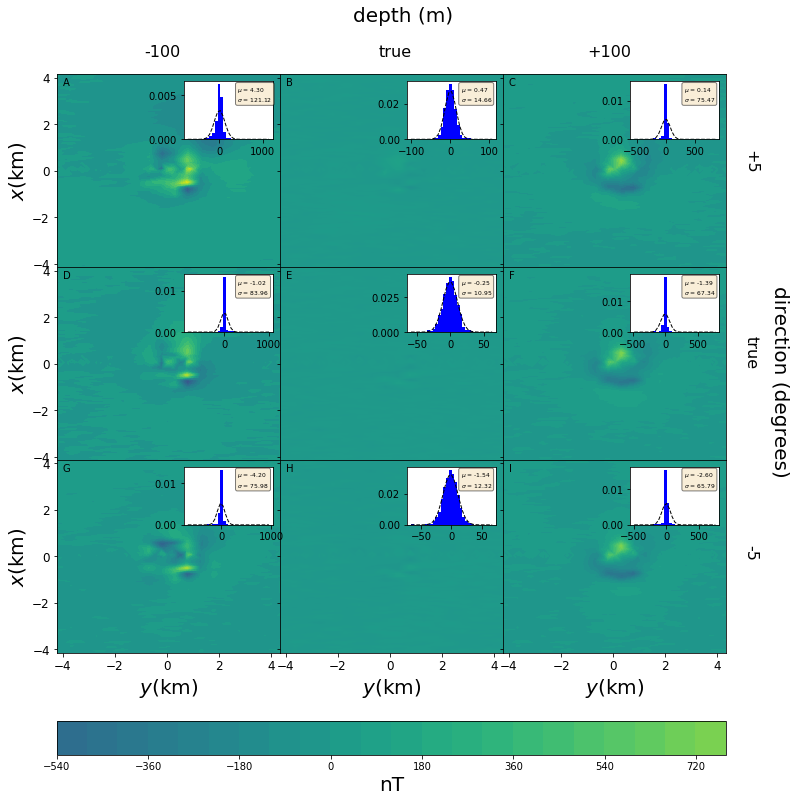

In [426]:
# plot
fig, axes = plt.subplots(3, 3, figsize=(12,14), sharey=True, sharex=True,
                         gridspec_kw={'hspace': 0, 'wspace': 0})
plt.text(6, 11, 'direction (degrees)', rotation=-90, fontsize=20)
plt.text(5, 9, 'true', rotation=-90, fontsize=16)
plt.text(5, 0, '-%d' % (results['var'][2]), rotation=-90, fontsize=16)
plt.text(5, 17, '+%d' % (results['var'][2]), rotation=-90, fontsize=16)

plt.text(-10, 23, 'depth (m)', fontsize=20)
plt.text(-9, 21.5, 'true', fontsize=16)
plt.text(-18, 21.5, '-%d' % (results['var'][0]), fontsize=16)
plt.text(-1, 21.5, '+%d' % (results['var'][0]), fontsize=16)

ax = [axes[0][0],axes[0][1],axes[0][2],
            axes[1][0],axes[1][1],axes[1][2],
            axes[2][0],axes[2][1],axes[2][2]]

for r, s, m, a, l in zip(plot2, std2, mean2, ax, letters):
    cb = a.tricontourf(yp/1000., xp/1000., r[-2], 20, cmap='viridis',
                       vmin=vmin, vmax=vmax)
    #a.set_ylabel('$x$(m)', fontsize=20)
    a.set_xlabel('$y$(km)', fontsize=20)
    a.tick_params(labelsize=12)
    a.text(-4, 4, l, va='top', ha='left')
    inset = inset_axes(a, width="40%", height="30%", loc=1, borderpad=0.7)
    n, bins, patches = plt.hist(r[-2],bins=nbins, normed=True, color='blue')
    gauss = sp.stats.norm.pdf(bins, m, s)
    inset.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
    inset.text(0.6, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(m, s),
                transform=inset.transAxes, fontsize=6,
            va='top', ha='left', bbox=props)
ax[0].set_ylabel('$x$(km)', fontsize=20)
ax[3].set_ylabel('$x$(km)', fontsize=20)
ax[6].set_ylabel('$x$(km)', fontsize=20)
cbar = plt.colorbar(cb, ax=axes, orientation="horizontal", pad=.09)
cbar.set_label('nT', fontsize=20)
plt.savefig(mypath+'complex_3d_residual_topxdir_true.png', dpi=300)
plt.show()

# Direction x Intensity

In [427]:
plot3 = [results['results'][16], results['results'][3],
        results['results'][15], results['results'][6],
        results['results'][0], results['results'][5],
        results['results'][18], results['results'][4],
        results['results'][17]]
std3 = [std_list[16], std_list[3],
        std_list[15], std_list[6],
        std_list[0], std_list[5],
        std_list[18], std_list[4],
        std_list[17]]
mean3 = [mean_list[16], mean_list[3],
        mean_list[15], mean_list[6],
        mean_list[0], mean_list[5],
        mean_list[18], mean_list[4],
        mean_list[17]]
verts3 = [verts_list[16], verts_list[3],
        verts_list[15], verts_list[6],
        verts_list[0], verts_list[5],
        verts_list[18], verts_list[4],
        verts_list[17]]

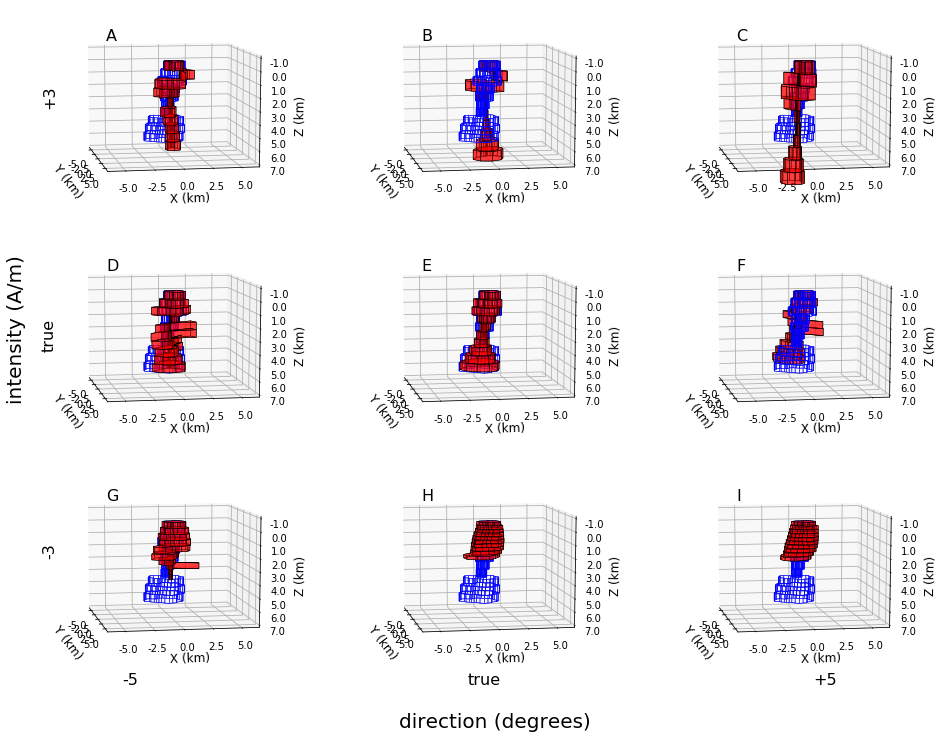

In [428]:
fig = plt.figure(figsize=(16,12))


for i, l in enumerate(letters):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    ax.add_collection3d(Poly3DCollection(verts_true, 
        alpha=0, facecolor='b', linewidths=0.5, edgecolors='b'))
    ax.add_collection3d(Poly3DCollection(verts3[i], alpha=0.5, 
         facecolor='r', linewidths=0.5, edgecolors='k'))

    ax.text(-35000, 4, 4, l, zdir=None, va='top', ha='left', fontsize= 16)
    ax.set_xlim(-5000, 5000, 100)
    ax.set_ylim(-5000, 5000, 100)
    ax.set_zlim(7000, -1000, 100)
    ax.set_xlabel('Y (km)', fontsize= 12)
    ax.set_ylabel('X (km)', fontsize= 12)
    ax.set_zlabel('Z (km)', fontsize= 12)
    ax.view_init(10, -10)
    ax.set_xticklabels(np.linspace(-5, 5, 5))
    ax.set_yticklabels(np.linspace(-5, 5, 5))
    ax.set_zticklabels(np.linspace(-1, 7, 9))

    #ax.tricontourf(xp, yp, results[i]['residual'],
    #                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

fig.text(0.1, 0.58, 'intensity (A/m)', rotation=90, fontsize=20)
fig.text(0.13, 0.51, 'true', rotation=90, fontsize=16)
fig.text(0.13, 0.25, '-%d' % (results['var'][1]), rotation=90, fontsize=16)
fig.text(0.13, 0.78, '+%d' % (results['var'][1]), rotation=90, fontsize=16)
fig.text(0.44, 0.05, 'direction (degrees)', fontsize=20)
fig.text(0.5, 0.1, 'true', fontsize=16)
fig.text(0.2, 0.1, '-%d' % (results['var'][2]), fontsize=16)
fig.text(0.8, 0.1, '+%d' % (results['var'][2]), fontsize=16)
plt.savefig(mypath+'complex_3d_estimates_dirxint_true.png', dpi=300)
plt.show()

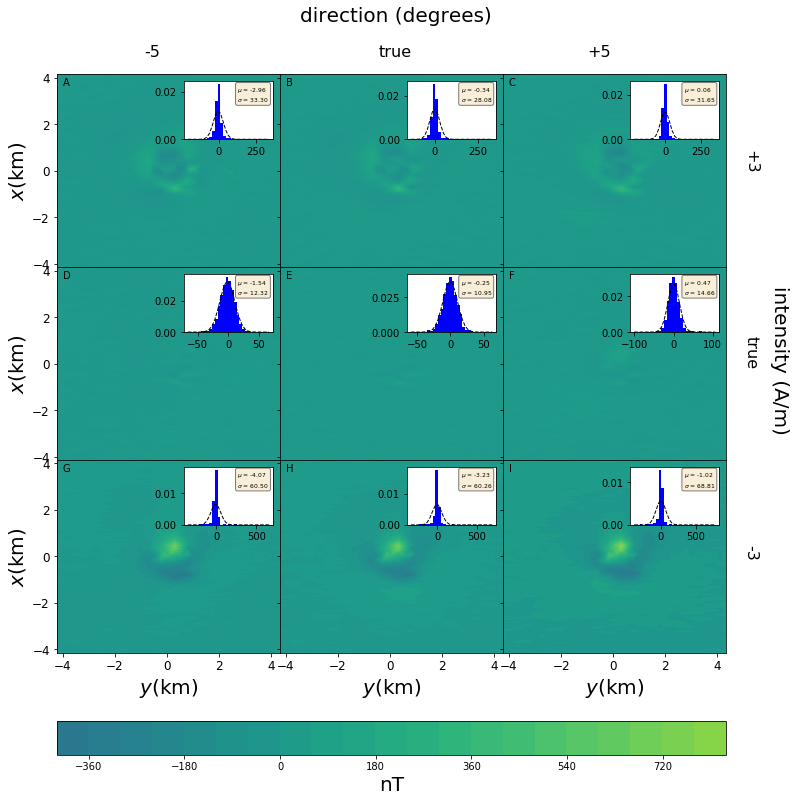

In [429]:
# plot
fig, axes = plt.subplots(3, 3, figsize=(12,14), sharey=True, sharex=True,
                         gridspec_kw={'hspace': 0, 'wspace': 0})
plt.text(6, 11, 'intensity (A/m)', rotation=-90, fontsize=20)
plt.text(5, 9, 'true', rotation=-90, fontsize=16)
plt.text(5, 0, '-%d' % (results['var'][1]), rotation=-90, fontsize=16)
plt.text(5, 17, '+%d' % (results['var'][1]), rotation=-90, fontsize=16)

plt.text(-12, 23, 'direction (degrees)', fontsize=20)
plt.text(-9, 21.5, 'true', fontsize=16)
plt.text(-18, 21.5, '-%d' % (results['var'][2]), fontsize=16)
plt.text(-1, 21.5, '+%d' % (results['var'][2]), fontsize=16)

ax = [axes[0][0],axes[0][1],axes[0][2],
            axes[1][0],axes[1][1],axes[1][2],
            axes[2][0],axes[2][1],axes[2][2]]

for r, s, m, a, l in zip(plot3, std3, mean3, ax, letters):
    cb = a.tricontourf(yp/1000., xp/1000., r[-2], 20, cmap='viridis',
                       vmin=vmin, vmax=vmax)
    #a.set_ylabel('$x$(m)', fontsize=20)
    a.set_xlabel('$y$(km)', fontsize=20)
    a.tick_params(labelsize=12)
    a.text(-4, 4, l, va='top', ha='left')
    inset = inset_axes(a, width="40%", height="30%", loc=1, borderpad=0.7)
    n, bins, patches = plt.hist(r[-2],bins=nbins, normed=True, color='blue')
    gauss = sp.stats.norm.pdf(bins, m, s)
    inset.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
    inset.text(0.6, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(m, s),
                transform=inset.transAxes, fontsize=6,
            va='top', ha='left', bbox=props)
ax[0].set_ylabel('$x$(km)', fontsize=20)
ax[3].set_ylabel('$x$(km)', fontsize=20)
ax[6].set_ylabel('$x$(km)', fontsize=20)
cbar = plt.colorbar(cb, ax=axes, orientation="horizontal", pad=.09)
cbar.set_label('nT', fontsize=20)
plt.savefig(mypath+'complex_3d_residual_dirxint_true.png', dpi=300)
plt.show()